In [1]:
import src.pre_processing as pp
import src.plots as plts

import numpy as np
import matplotlib.pyplot as plt

## Preprocessing

### resize images to 128x128

In [2]:
X, Y, Z = pp.get_data()

### Split train, validation, test

In [3]:
X_train, Y_train, Z_train, X_val, Y_val, Z_val, X_test, Y_test, Z_test = pp.split_data(X, Y, Z)

### Geometric Augmentation

In [4]:
X_train_aug, Y_train_aug, Z_train_aug = pp.augment_data(X_train, Y_train, Z_train)

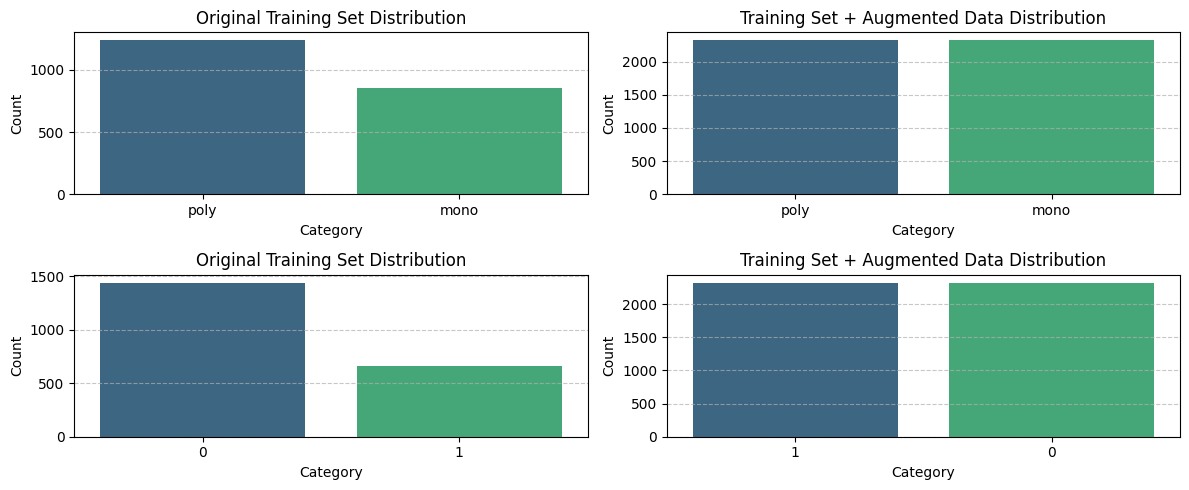

In [5]:
# compare the training set and the training + augmented set distributions
# first concatenate the original and augmented data
X_train_combined = np.concatenate((X_train, X_train_aug), axis=0)
Y_train_combined = np.concatenate((Y_train, Y_train_aug), axis=0)
Z_train_combined = np.concatenate((Z_train, Z_train_aug), axis=0)
fig, axs = plt.subplots(2, 2, figsize=(12, 5))
plts.plot_distribution(Z_train, 'Original Training Set Distribution', axs[0,0])
plts.plot_distribution(Z_train_combined, 'Training Set + Augmented Data Distribution', axs[0,1])
plts.plot_distribution(Y_train, 'Original Training Set Distribution', axs[1,0])
plts.plot_distribution(Y_train_combined, 'Training Set + Augmented Data Distribution', axs[1,1])
plt.tight_layout()
plt.show()

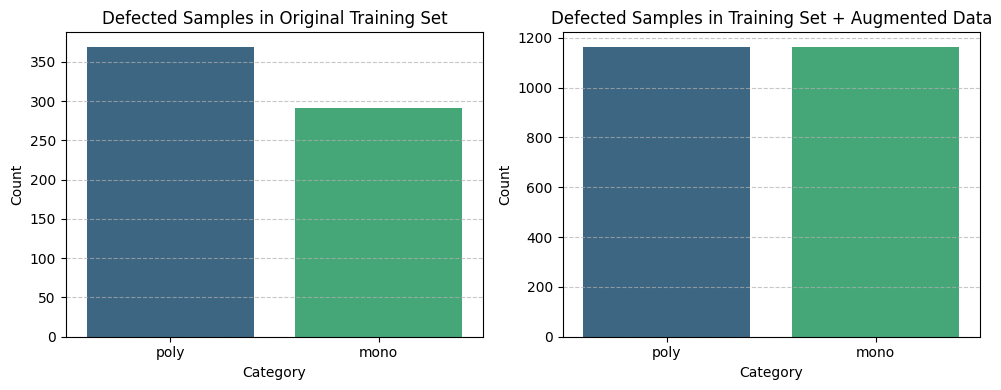

In [6]:
# among the defected samples Y=1 plot the distribution Z=mono Z=poly
Z_train_defected = Z_train[Y_train == 1]
Z_train_combined_defected = Z_train_combined[Y_train_combined == 1]
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
plts.plot_distribution(Z_train_defected, 'Defected Samples in Original Training Set', axs[0])
plts.plot_distribution(Z_train_combined_defected, 'Defected Samples in Training Set + Augmented Data', axs[1])
plt.tight_layout()
plt.show() 

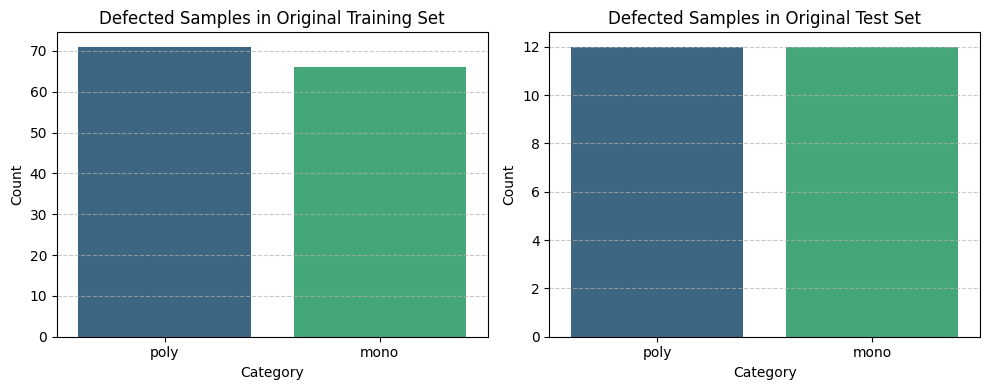

In [8]:
# among the defected samples Y=1 plot the distribution Z=mono Z=poly
Z_val_defected = Z_val[Y_val == 1]
Z_test_defected = Z_test[Y_test == 1]
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
plts.plot_distribution(Z_val_defected, 'Defected Samples in Original Training Set', axs[0])
plts.plot_distribution(Z_test_defected, 'Defected Samples in Original Test Set', axs[1])
plt.tight_layout()
plt.show() 

# ADD pixel normalization 